# EDA

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import f1_score

import pickle

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
train = pd.read_csv('preprocessed-data/pre_train.csv')
test = pd.read_csv('preprocessed-data/pre_test.csv')

### Train Set

In [3]:
train.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,action_type_NUM,combined_shot_type_NUM,shot_type_NUM,shot_zone_area_NUM,shot_zone_basic_NUM,shot_zone_range_NUM
0,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,0,2000-01,22,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2,Jump,5,2,Left Side(L),Mid-Range,12
1,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,0,2000-01,45,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3,Jump,5,2,Left Side Center(LC),Mid-Range,20
2,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,0,2000-01,52,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4,Jump,5,2,Right Side Center(RC),Mid-Range,20
3,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,0,2000-01,19,0,1.0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5,Dunk,1,2,Center(C),Restricted Area,8
4,Jump Shot,Jump Shot,244,20000012,34.0553,-145,-11,-118.4148,9,3,0,2000-01,32,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,6,Jump,5,2,Left Side(L),Mid-Range,12


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25697 entries, 0 to 25696
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   action_type             25697 non-null  object 
 1   combined_shot_type      25697 non-null  object 
 2   game_event_id           25697 non-null  int64  
 3   game_id                 25697 non-null  int64  
 4   lat                     25697 non-null  float64
 5   loc_x                   25697 non-null  int64  
 6   loc_y                   25697 non-null  int64  
 7   lon                     25697 non-null  float64
 8   minutes_remaining       25697 non-null  int64  
 9   period                  25697 non-null  int64  
 10  playoffs                25697 non-null  int64  
 11  season                  25697 non-null  object 
 12  seconds_remaining       25697 non-null  int64  
 13  shot_distance           25697 non-null  int64  
 14  shot_made_flag          25697 non-null

In [7]:
train.describe()

,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,seconds_remaining,shot_distance,shot_made_flag,team_id,shot_id,combined_shot_type_NUM,shot_type_NUM,shot_zone_range_NUM
count,25697.000000,2.569700e+04,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,25697.000000,2.569700e+04,25697.000000,25697.00000,25697.000000,25697.000000
mean,249.348679,2.474109e+07,33.953043,7.148422,91.257345,-118.262652,4.886796,2.520800,0.146243,28.311554,13.457096,0.446161,1.610613e+09,15328.166946,4.46986,2.210608,15.471845
std,149.778520,7.738108e+06,0.088152,110.073147,88.152106,0.110073,3.452475,1.151626,0.353356,17.523392,9.388725,0.497103,0.000000e+00,8860.462397,1.06529,0.407749,6.467805
min,2.000000,2.000001e+07,33.253300,-250.000000,-44.000000,-118.519800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.610613e+09,2.000000,1.00000,2.000000,8.000000
25%,111.000000,2.050006e+07,33.884300,-67.000000,4.000000,-118.336800,2.000000,1.000000,0.000000,13.000000,5.000000,0.000000,1.610613e+09,7646.000000,5.00000,2.000000,8.000000
50%,253.000000,2.090034e+07,33.970300,0.000000,74.000000,-118.269800,5.000000,3.000000,0.000000,28.000000,15.000000,0.000000,1.610613e+09,15336.000000,5.00000,2.000000,12.000000
75%,367.000000,2.960027e+07,34.040300,94.000000,160.000000,-118.175800,8.000000,3.000000,0.000000,43.000000,21.000000,1.000000,1.610613e+09,22976.000000,5.00000,2.000000,20.000000
max,653.000000,4.990009e+07,34.088300,248.000000,791.000000,-118.021800,11.000000,7.000000,1.000000,59.000000,79.000000,1.000000,1.610613e+09,30697.000000,6.00000,3.000000,40.000000


### Test Set

In [5]:
test.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id,action_type_NUM,combined_shot_type_NUM,shot_type_NUM,shot_zone_area_NUM,shot_zone_basic_NUM,shot_zone_range_NUM
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,0,2000-01,27,18,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1,Jump,5,2,Right Side(R),Mid-Range,20
1,Jump Shot,Jump Shot,254,20000012,34.0163,1,28,-118.2688,8,3,0,2000-01,5,2,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,8,Jump,5,2,Center(C),Restricted Area,8
2,Driving Layup Shot,Layup,100,20000019,34.0443,0,0,-118.2698,0,1,0,2000-01,1,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,17,Layup,3,2,Center(C),Restricted Area,8
3,Driving Layup Shot,Layup,249,20000019,34.0443,0,0,-118.2698,10,3,0,2000-01,46,0,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-11-01,LAL vs. UTA,UTA,20,Layup,3,2,Center(C),Restricted Area,8
4,Jump Shot,Jump Shot,4,20000047,33.9683,163,76,-118.1068,11,1,0,2000-01,26,17,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-11-04,LAL @ VAN,VAN,33,Jump,5,2,Right Side(R),Mid-Range,20


# Best Model

---
Out of the models ran so far, this is the best model.
```python
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

ada_params = {
    'n_estimators':[50,100,150],
    'learning_rate':[0.9,0.1,.95],
    'base_estimator__max_depth': [1,2],
    'base_estimator__min_samples_leaf':[1,2]
}

gs3 = GridSearchCV(ada, param_grid=ada_params, cv=3, n_jobs=4, verbose=1)
gs3.fit(X_train, y_train)
```

# Scores

---
```python
{'base_estimator__max_depth': 1, 'base_estimator__min_samples_leaf': 2, 'learning_rate': 0.95, 'n_estimators': 100}
Train Score 0.6847699814126395
Val Score 0.6770428015564203

f1_score = 0.5584394647751089
accuracy_score = 0.6770428015564203
```

In [10]:
# the pickled model
ada = pickle.load(open('assets/ada_model.pkl','rb'))

# Value Counts

---
For the sake of time, we will only use the `train` dataset.

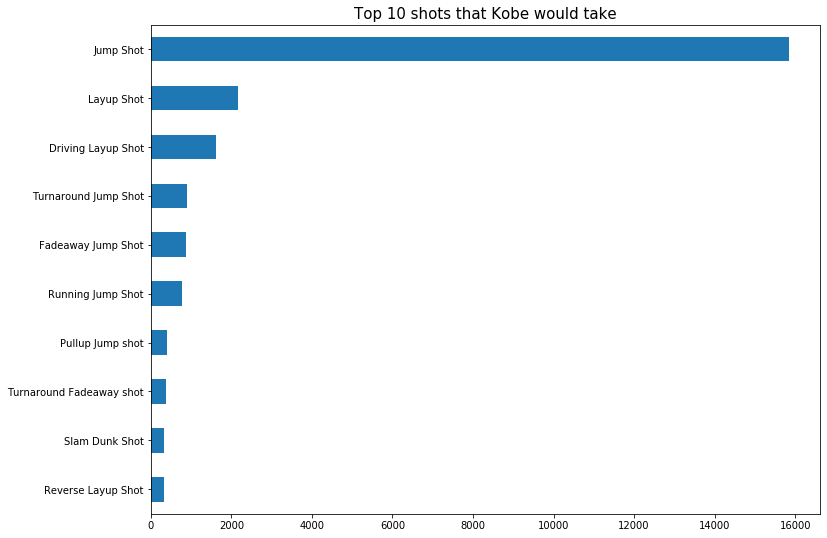

In [23]:
plt.figure(figsize=(12,9))
train['action_type'].value_counts().sort_values().tail(10).plot(kind='barh')
plt.title('Top 10 shots that Kobe would take', size=15);

In [30]:
train.groupby('action_type')['shot_made_flag'].value_counts(normalize=True)

action_type                      shot_made_flag
Alley Oop Dunk Shot              1.0               0.947368
                                 0.0               0.052632
Alley Oop Layup shot             1.0               0.716418
                                 0.0               0.283582
Cutting Layup Shot               1.0               0.666667
                                 0.0               0.333333
Driving Bank shot                1.0               0.666667
                                 0.0               0.333333
Driving Dunk Shot                1.0               0.976654
                                 0.0               0.023346
Driving Finger Roll Layup Shot   1.0               0.881356
                                 0.0               0.118644
Driving Finger Roll Shot         1.0               0.852941
                                 0.0               0.147059
Driving Floating Bank Jump Shot  1.0               1.000000
Driving Floating Jump Shot       0.0               0

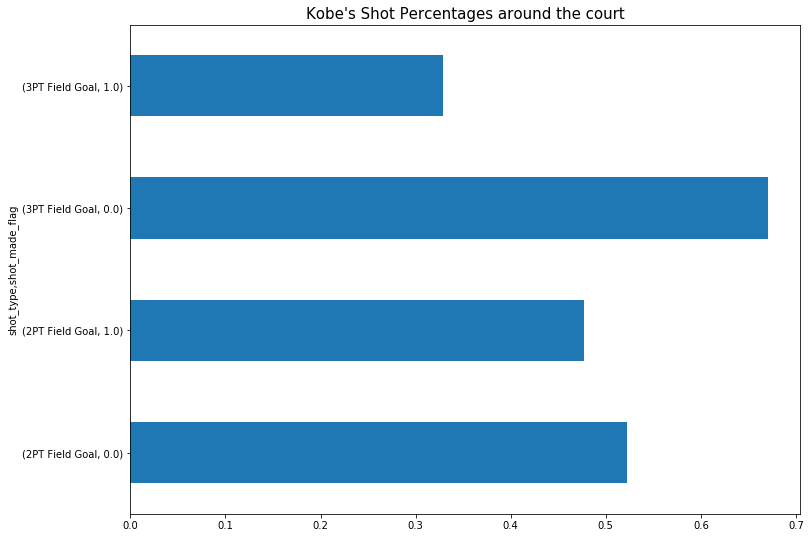

In [36]:
plt.figure(figsize=(12,9))
train.groupby('shot_type')['shot_made_flag'].value_counts(normalize=True).plot(kind='barh')
plt.title('Kobe\'s Shot Percentages around the court',size=15);

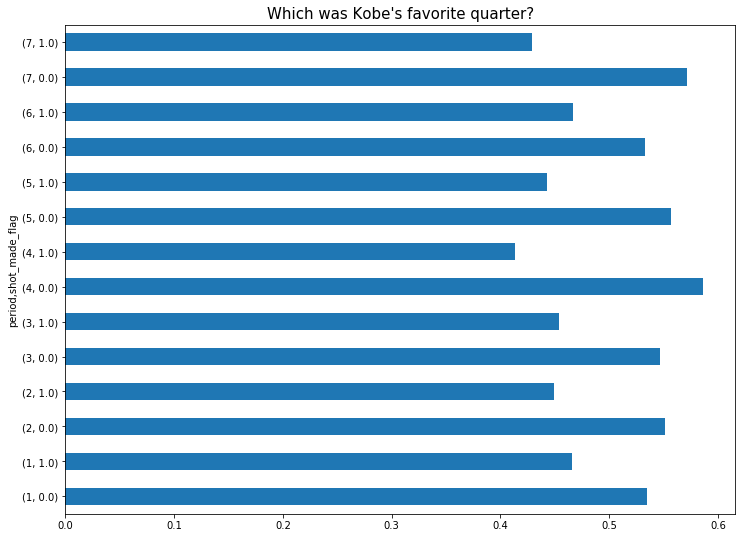

In [40]:
plt.figure(figsize=(12,9))
train.groupby('period')['shot_made_flag'].value_counts(normalize=True).plot(kind='barh')
plt.title('Which was Kobe\'s favorite quarter?',size=15);

In [ ]:
plt.figure(figsize=(12,9))
train.groupby('opp')['shot_made_flag'].value_counts(normalize=True).plot(kind='barh')
plt.title('Which was Kobe\'s favorite quarter?',size=15);